In [1]:
### Kütüphane import

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,classification_report,confusion_matrix

In [2]:
te = pd.read_csv('veriler.csv')
df = te.copy()
df['Tip'] = (df['Tip']=='Ke').astype(int)

In [3]:
df.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,20230731215338,2023.07.31,21:53:38.29,37.4153,37.1703,4.0,3.5,0.0,3.5,3.4,0.0,0.0,1,DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]
1,2,20230731152316,2023.07.31,15:23:16.85,38.1413,38.4340,5.2,3.5,0.0,3.5,3.4,0.0,0.0,1,AKSU-SINCIK (ADIYAMAN) [West 6.4 km]
2,3,20230731025049,2023.07.31,02:50:49.84,37.8352,26.8353,6.2,3.0,0.0,3.0,0.0,0.0,0.0,1,SISAM ADASI (EGE DENIZI)
3,4,20230730201940,2023.07.30,20:19:40.49,40.8085,31.0183,5.3,3.1,0.0,3.1,3.1,0.0,0.0,1,ICMELER-GOLYAKA (DUZCE) [South East 0.7 km]
4,5,20230730161352,2023.07.30,16:13:52.62,38.1290,38.1863,2.4,3.0,0.0,3.0,0.0,0.0,0.0,1,CAMPINAR-CELIKHAN (ADIYAMAN) [North West 4.3 km]


In [4]:
df.drop(['No    ','Deprem Kodu','Olus tarihi','Olus zamani','Yer'],axis=1,inplace=True)

In [5]:
df['Tip'].value_counts()

1    49886
0      114
Name: Tip, dtype: int64

In [6]:
df.head()

,Enlem,Boylam,Der(km),xM,MD,ML,Mw,Ms,Mb,Tip
0,37.4153,37.1703,4.0,3.5,0.0,3.5,3.4,0.0,0.0,1
1,38.1413,38.4340,5.2,3.5,0.0,3.5,3.4,0.0,0.0,1
2,37.8352,26.8353,6.2,3.0,0.0,3.0,0.0,0.0,0.0,1
3,40.8085,31.0183,5.3,3.1,0.0,3.1,3.1,0.0,0.0,1
4,38.1290,38.1863,2.4,3.0,0.0,3.0,0.0,0.0,0.0,1


In [7]:
df['Der'] = df['Der(km)']
df.drop(['Der(km)'],axis=1,inplace=True)

In [8]:
df.head()

,Enlem,Boylam,xM,MD,ML,Mw,Ms,Mb,Tip,Der
0,37.4153,37.1703,3.5,0.0,3.5,3.4,0.0,0.0,1,4.0
1,38.1413,38.4340,3.5,0.0,3.5,3.4,0.0,0.0,1,5.2
2,37.8352,26.8353,3.0,0.0,3.0,0.0,0.0,0.0,1,6.2
3,40.8085,31.0183,3.1,0.0,3.1,3.1,0.0,0.0,1,5.3
4,38.1290,38.1863,3.0,0.0,3.0,0.0,0.0,0.0,1,2.4


In [9]:
### Data düzenlendi istediğim değerleri bıraktım daha fazla inceleyceğim şimdi

In [10]:
df.info() ## Null yani kayıp değer bulunuyor o da MW

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Enlem   50000 non-null  float64
 1   Boylam  50000 non-null  float64
 2   xM      50000 non-null  float64
 3   MD      50000 non-null  float64
 4   ML      50000 non-null  float64
 5   Mw      12922 non-null  float64
 6   Ms      50000 non-null  float64
 7   Mb      50000 non-null  float64
 8   Tip     50000 non-null  int64  
 9   Der     50000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.8 MB


In [11]:
df.drop(['Mw'],axis=1,inplace=True)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Enlem,50000.0,38.300424,1.464283,35.0,37.192725,38.36,39.26755,41.9982
Boylam,50000.0,32.963727,5.746905,26.0,27.820000,30.88,38.02510,44.9992
xM,50000.0,3.344862,0.395971,3.0,3.100000,3.20,3.50000,7.7000
MD,50000.0,1.921914,1.613644,0.0,0.000000,3.00,3.20000,6.7000
ML,50000.0,1.464486,1.732178,0.0,0.000000,0.00,3.20000,7.5000
Ms,50000.0,0.001400,0.087321,0.0,0.000000,0.00,0.00000,6.4000
Mb,50000.0,0.051334,0.472931,0.0,0.000000,0.00,0.00000,5.8000
Tip,50000.0,0.997720,0.047695,0.0,1.000000,1.00,1.00000,1.0000
Der,50000.0,9.995948,12.580761,0.0,5.000000,6.90,10.50000,154.7000


In [13]:
df.corr()

,Enlem,Boylam,xM,MD,ML,Ms,Mb,Tip,Der
Enlem,1.000000,0.221356,-0.107137,0.164644,-0.175177,0.003331,-0.030247,-0.029786,-0.231389
Boylam,0.221356,1.000000,0.077814,-0.067345,0.078087,0.004094,0.046159,-0.001012,-0.146107
xM,-0.107137,0.077814,1.000000,-0.196492,0.432205,0.087494,0.305157,0.033692,0.053213
MD,0.164644,-0.067345,-0.196492,1.000000,-0.929313,0.017116,-0.041307,-0.033108,0.018478
ML,-0.175177,0.078087,0.432205,-0.929313,1.000000,-0.003728,0.117370,0.039690,0.001302
Ms,0.003331,0.004094,0.087494,0.017116,-0.003728,1.000000,0.069366,0.000766,0.014441
Mb,-0.030247,0.046159,0.305157,-0.041307,0.117370,0.069366,1.000000,0.005189,0.066061
Tip,-0.029786,-0.001012,0.033692,-0.033108,0.039690,0.000766,0.005189,1.000000,0.008604
Der,-0.231389,-0.146107,0.053213,0.018478,0.001302,0.014441,0.066061,0.008604,1.000000


In [14]:
X=df.drop(['xM'],axis=1)
y=df['xM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [15]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
lin_pred=model.predict(X_test)

In [16]:
print(mean_absolute_error(y_test,lin_pred))

0.1748840823490118


In [17]:
print(np.sqrt(mean_squared_error(y_test,lin_pred)))

0.270991060295233


In [18]:
lin_error = mean_absolute_error(y_test,lin_pred)

In [19]:
lin_ss_error = np.sqrt(mean_squared_error(y_test,lin_pred))

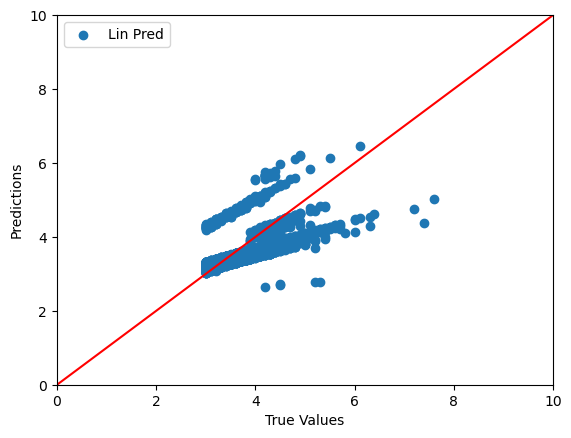

In [20]:
plt.scatter(x = y_test,y=lin_pred ,label = 'Lin Pred')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims=[0,10]
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
_ = plt.plot(lims,lims,c='red')

In [21]:
comp_df = pd.DataFrame(y_test,columns=['xM'])
comp_df['Pred'] = lin_pred

comp_df.head()



ad_comp_df=comp_df.reset_index()

In [22]:
ad_comp_df.head()

,index,xM,Pred
0,33553,3.7,3.407768
1,9427,3.7,3.533572
2,199,3.7,3.564108
3,12447,3.1,3.297328
4,39489,3.3,3.245367


In [23]:
error_per_list = []
for i in range(len(ad_comp_df)):
    error_per = ((100) - (((abs((ad_comp_df['xM'][i])-ad_comp_df['Pred'][i]))*100)/(ad_comp_df['xM'][i])))
    error_per_list.append(error_per)
    
    
    ### pred ve real değerleri kurduğum bir matematiksel işlem ile yüzdelik dilimini veriyor accuracy bazında 

In [24]:
error_per_list[:5]

[92.1018263362062,
 95.50195315868847,
 96.32725082364534,
 93.63456853577189,
 98.34445775161221]

In [25]:
ad_comp_df['Acc_per'] = error_per_list

In [26]:
ad_comp_df.head()

,index,xM,Pred,Acc_per
0,33553,3.7,3.407768,92.101826
1,9427,3.7,3.533572,95.501953
2,199,3.7,3.564108,96.327251
3,12447,3.1,3.297328,93.634569
4,39489,3.3,3.245367,98.344458


In [27]:
ad_comp_df['Acc_per'].mean()

95.03193176005065

In [28]:
### ortalama değerleri 95 tutarlı bir şekilde veriyor %5 lik bir uzaklık görülüyor gerçek değerlere

In [29]:
df.head()

,Enlem,Boylam,xM,MD,ML,Ms,Mb,Tip,Der
0,37.4153,37.1703,3.5,0.0,3.5,0.0,0.0,1,4.0
1,38.1413,38.4340,3.5,0.0,3.5,0.0,0.0,1,5.2
2,37.8352,26.8353,3.0,0.0,3.0,0.0,0.0,1,6.2
3,40.8085,31.0183,3.1,0.0,3.1,0.0,0.0,1,5.3
4,38.1290,38.1863,3.0,0.0,3.0,0.0,0.0,1,2.4


# TensorFlow

In [30]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='linear',input_shape=(8,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='linear'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='linear'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1)
])

    nn_model.compile(optimizer = tf.keras.optimizers.legacy.Adam(lr),loss='mean_squared_error')
    history = nn_model.fit(
       X_train,y_train, epochs = epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
    
    return nn_model,history

In [31]:
least_error = float('inf')
least_error_list = []
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.1,0.01,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes , dropout {dropout_prob} ,lr {lr} , batch size {batch_size}")
                nn_model,history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                nn_reg_prediction = nn_model.predict(X_test)
                least = mean_absolute_error(y_test,nn_reg_prediction)
                least_error_list.append(least)
                if least_error > least:
                    least_error = least

16 nodes , dropout 0 ,lr 0.1 , batch size 32
469/469 [==============================] - 0s 182us/step
16 nodes , dropout 0 ,lr 0.1 , batch size 64
469/469 [==============================] - 0s 180us/step
16 nodes , dropout 0 ,lr 0.1 , batch size 128
469/469 [==============================] - 0s 183us/step
16 nodes , dropout 0 ,lr 0.01 , batch size 32
469/469 [==============================] - 0s 182us/step
16 nodes , dropout 0 ,lr 0.01 , batch size 64
469/469 [==============================] - 0s 182us/step
16 nodes , dropout 0 ,lr 0.01 , batch size 128
469/469 [==============================] - 0s 183us/step
16 nodes , dropout 0 ,lr 0.001 , batch size 32
469/469 [==============================] - 0s 183us/step
16 nodes , dropout 0 ,lr 0.001 , batch size 64
469/469 [==============================] - 0s 181us/step
16 nodes , dropout 0 ,lr 0.001 , batch size 128
469/469 [==============================] - 0s 196us/step
16 nodes , dropout 0.2 ,lr 0.1 , batch size 32
469/469 [==============

In [32]:
lin_error ## Linear Regression

0.1748840823490118

In [33]:
least_error ## Tf Regression 

0.17238602846463522

In [34]:
nn_lin_df = pd.DataFrame()
nn_lin_df['bestparamresult']=least_error_list

In [35]:
nn_lin_df['bestparamresult'].idxmin()

22

In [36]:
nn_lin_df['bestparamresult']

0      2.274116
1      0.272072
2      0.358633
3      0.172706
4      0.190632
5      0.206864
6      0.177341
7      0.177585
8      0.175766
9      0.397564
10     0.261855
11     0.200253
12     0.186155
13     0.236997
14     0.183101
15     0.180117
16     0.176049
17     0.178680
18     1.153419
19     7.647375
20     0.512706
21     0.181688
22     0.172386
23     0.174367
24     0.199341
25     0.220735
26     0.189581
27     7.031491
28     0.329003
29     6.727235
30     0.178441
31     0.193074
32     0.186816
33     0.184822
34     0.189042
35     0.192757
36     0.754556
37    15.174808
38    27.696232
39     0.178423
40     0.273636
41     0.184716
42     0.181547
43     0.176099
44     0.183678
45     7.564833
46    43.239729
47     0.794771
48     0.223991
49     0.185744
50     0.178671
51     0.172992
52     0.175918
53     0.177972
Name: bestparamresult, dtype: float64

In [ ]:
# 32 nodes , dropout 0 ,lr 0.01 , batch size 64

In [ ]:
# Tekrardan bu en az error gösteren değeri modele yerleştireceğim

In [37]:
train_model(X_train,y_train,32,0,0.01,64,100)

(<keras.src.engine.sequential.Sequential at 0x2d42fb0d0>,
 <keras.src.callbacks.History at 0x176256f50>)

In [42]:
nn_best_pred = nn_model.predict(X_test)

469/469 [==============================] - 0s 202us/step


In [57]:
nn_best_pred.mean()

3.3602011

In [56]:
lin_pred.mean()

3.344000804340034

In [41]:
nn_comp_df = pd.DataFrame(y_test,columns=['xM'])
nn_comp_df['Pred'] = nn_best_pred

nn_comp_df.head()





,xM,Pred
33553,3.7,3.457040
9427,3.7,3.621256
199,3.7,3.610310
12447,3.1,3.296708
39489,3.3,3.229874


In [44]:
ad_nn_comp_df=comp_df.reset_index()

In [46]:
ad_nn_comp_df.drop(['index'],axis=1,inplace=True)

,xM,Pred
0,3.7,3.407768
1,3.7,3.533572
2,3.7,3.564108
3,3.1,3.297328
4,3.3,3.245367
...,...,...
14995,4.1,3.679065
14996,3.4,3.303194
14997,3.5,3.295657
14998,3.1,3.171633


In [49]:
nn_error_per_list = []
for i in range(len(ad_nn_comp_df)):
    nn_error_per = ((100) - (((abs((ad_nn_comp_df['xM'][i])-ad_nn_comp_df['Pred'][i]))*100)/(ad_nn_comp_df['xM'][i])))
    nn_error_per_list.append(nn_error_per)

In [50]:
nn_error_per_list[:5]

[92.1018263362062,
 95.50195315868847,
 96.32725082364534,
 93.63456853577189,
 98.34445775161221]

In [51]:
ad_nn_comp_df['Acc_per'] = nn_error_per_list

In [66]:
ad_nn_comp_df

,xM,Pred,Acc_per
0,3.7,3.407768,92.101826
1,3.7,3.533572,95.501953
2,3.7,3.564108,96.327251
3,3.1,3.297328,93.634569
4,3.3,3.245367,98.344458
...,...,...,...
14995,4.1,3.679065,89.733294
14996,3.4,3.303194,97.152750
14997,3.5,3.295657,94.161626
14998,3.1,3.171633,97.689271


In [65]:
ad_comp_df

,index,xM,Pred,Acc_per
0,33553,3.7,3.407768,92.101826
1,9427,3.7,3.533572,95.501953
2,199,3.7,3.564108,96.327251
3,12447,3.1,3.297328,93.634569
4,39489,3.3,3.245367,98.344458
...,...,...,...,...
14995,15168,4.1,3.679065,89.733294
14996,49241,3.4,3.303194,97.152750
14997,39317,3.5,3.295657,94.161626
14998,42191,3.1,3.171633,97.689271


In [53]:
ad_nn_comp_df['Acc_per'].mean()

95.03193176005065